# Predicting Tomorrow's Stock Prices with Machine Learning

In [81]:
# Import Yahoo Finance API 
import yfinance as yf

In [82]:
# Download Price History

sp500 = yf.Ticker("^GSPC") # ^GSPC is the S&P500 Index

In [83]:
# Query Historical Prices
sp500 = sp500.history(period = 'max') # history method will query all data from when the index was created

In [84]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-06-10,3974.389893,3974.389893,3900.159912,3900.860107,3936120000,0,0
2022-06-13,3838.149902,3838.149902,3734.300049,3749.629883,4572820000,0,0
2022-06-14,3763.520020,3778.179932,3705.679932,3735.479980,4126400000,0,0


## Observations
- Each row is the price on a single trading day.
- We have the opening price, the high for the day, the low for the day, the closing price, the volume of trades for that day. 
    * **These columns** will be instrumental in making predictions on whether or not the price will go up or down tomorrow.
- The `dividends` and `Stock Splits` columns won't be used in our machine learning model. 

In [85]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-06-03', '2022-06-06', '2022-06-07', '2022-06-08',
               '2022-06-09', '2022-06-10', '2022-06-13', '2022-06-14',
               '2022-06-15', '2022-06-16'],
              dtype='datetime64[ns]', name='Date', length=18233, freq=None)

As we saw in the dataframe earlier we have a DateTimeIndex for our index of the dataframe. This column will be used for slicing and indexing later on. Next, what I'm going to do is clean and visualize the stock market data. 

## Data Cleaning

First, we are going to do some data cleaning, but I wanted to visualize the closing prices just to have a look at what **closing** prices have looked like historically.

<AxesSubplot:xlabel='Date'>

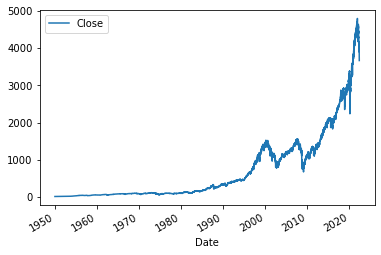

In [86]:
# Visualizing the closing price
sp500.plot.line(y= 'Close', use_index = True)

Whoa! It looks like the index fund has skyrocketed over the past decade. Looks like an opportunity missed!

### Removing unneeded columns
First, I'm going to remove the `Dividends` and `Stock Splits` columns. I'm removing these columns because these are better used for individual stocks rather than gauging an index. 

In [87]:
# Deleting Dividends
del sp500["Dividends"]

# Deleting Stock Splits
del sp500["Stock Splits"]

## Choosing a target to predict on

Next, I'll set up a target to predict on using machine learning. Some people like trying to predict the absolute price, but what most people want is to predict on the direction the stock is trending in. We want to know if the stock will go up if we buy the stock. 

**So,** what I'm trying to figure out is the answer to this question:
- On days that the stock actually goes up, can I predict that the stock will indeed go up?



In [88]:
# Create a column called Tomorrow
sp500["Tomorrow"] = sp500["Close"].shift(-1)

# Observe the transformation
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,16.850000
1950-01-04,16.85,16.85,16.85,16.85,1890000,16.930000
1950-01-05,16.93,16.93,16.93,16.93,2550000,16.980000
1950-01-06,16.98,16.98,16.98,16.98,2010000,17.080000
1950-01-09,17.08,17.08,17.08,17.08,2520000,17.030001


What I did here is I took the `Close` column and and shifted the prices forward one day. This is going to be our target and what we will try to predict using Machine Learning. 

In [89]:
# Target Column
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # Creates a boolean outcome for the comparison and then converts the boolean to an integer. 

# Check output
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,16.850000,1
1950-01-04,16.85,16.85,16.85,16.85,1890000,16.930000,1
1950-01-05,16.93,16.93,16.93,16.93,2550000,16.980000,1
1950-01-06,16.98,16.98,16.98,16.98,2010000,17.080000,1
1950-01-09,17.08,17.08,17.08,17.08,2520000,17.030001,0


We needed a way to compare whether or not tomorrow's price is going up or not. So what we did was create a new column called `Target` that will compare the if the closing price is smaller than tomorrow's opening price. After created that Boolean comparison, then we converted that comparison value to an integer since Machine Learning works with numerical data.

### Filtering for relevant data
We need to remove some historical data because the stock market has shifted fundamentally at different points in history. Personally, I want data relevant to my lifetime. I was born in 1989, so I'm going to look at data from 1990. 

In [90]:
# Indexing for data from 1990
sp500 = sp500.loc["1990-01-01":].copy()

# Observe the output
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


Now that I have my target variables set up, I want to start pulling in some of the models that I'll be using. Random forest will be used first because of it's ability to learn from complex decision trees decisions and then averaging the results from the decision trees. This will help keep our predictions resistant to overfitting. One thing to note is that stock price predictions outcomes are mostly non-linear which makes it so difficult to make predictions on the stock market. For this reason, Random Forest algorithms are great at picking up non-linear relationships. 

In [91]:
# Import sklearn models
from sklearn.ensemble import RandomForestClassifier

# Initialize random model
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1) # Set the min_samples split to 100 to prevent overfitting, the lower the number the more accurate the model, random_state = 1 ensures the model is reproducible

# Split the data into train and test sets
train = sp500.iloc[:-100] # all rows except the last 100 rows into the training set
test = sp500.iloc[-100:] # the last 100 rows into the test set

# Create a list of the predictors
predictors = ["Close", "Volume", "Open", "High", "Low"]  # Can't use tomorrow our target because those would result in leakage of information to our model

# Fit the model using the predictors
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

### Explanation
- An important thing to note is that time series data can't use cross-validation because we can't use future data to predict the past, this will leak future information into the model.
- Additionally, we are just going to do a simple split of the dataset to start. First, I'm going to split the train set that will contain all rows except for the last 100 rows of the dataset
- Then, I'll split the test set for the last 100 rows in the set which will be used later.
- I fit the model with the predictors chosen and was careful not the include the tomorrow or target columns as that would leak information to our set.
- Finally, I passed the Target column into our prediction argument in our model.

### Measure the model accuracy
Next, I'll import the precision score metric from scikit-learn to measure the accuracy of the model up to this point. I'll be using this error metric because I'm assuming the end-user of this particular model wants to buy stock and they want to hold the stock and sell it. We want to know that when we buy the stock, after we buy it the stock market will increase. 

In [92]:
# Import sklearn
from sklearn.metrics import precision_score

# Generate predictions using the model
preds = model.predict(test[predictors])

preds

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Numpy arrays are difficult to work with and not visually consumable, so I'm going to convert this array into a pandas Series. 

In [93]:
# Import pandas as pd

import pandas as pd

# Convert the numpy arrary into a series
preds = pd.Series(preds, index = test.index)

preds

Date
2022-01-25    1
2022-01-26    1
2022-01-27    1
2022-01-28    1
2022-01-31    1
             ..
2022-06-10    1
2022-06-13    1
2022-06-14    1
2022-06-15    1
2022-06-16    1
Length: 100, dtype: int64

In [94]:
# Calculate precision score
precision_score(test["Target"], preds)

0.4444444444444444

Yikes, at the current moment when we made a prediction that the stock price would go up, it's only going up 44% of the time. We can do better. Next, I'm going to plot the predictions so we can see how it actually looks. 

In [95]:
# Combined actual values with predicted values
combined = pd.concat([test["Target"], preds], axis = 1)

<AxesSubplot:xlabel='Date'>

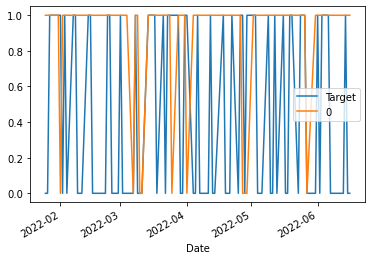

In [96]:
# Generate a plot
combined.plot()

Well at the moment, we can see that the model isn't performing too well. Our target values don't seem to be in line with a lot of the predictions we've been making. What we'll do next is build a more robust model. I'm going to utilize backtesting to test across multiple years of data. What I'm going to do first, is write a couple of functions that will speed up the process of building a model and backtesting. 

### Lightening the workload

In [97]:
## Create a Prediction Function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    
    #return 
    return combined

In [98]:
# Create a backtest function

def backtest(data, model, predictors, start=2500, step=250): # Start variable is 2500 or 10 years of data, a step is training the model for one year, then the next year, and then the next
    all_predictions = [] # a list of dataframe where each dataframe in the list is a prediction of the single year

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy() # creates the training split, all years prior to the current year
        test = data.iloc[i:(i+step)].copy() # creates the test set which will train the model for a year
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions) # concatenate all of the predictions together

Now I'll actually perform the backtest on the sp500 data. 

In [99]:
# Apply the backtest on the model and the data

predictions = backtest(sp500, model, predictors)

In [100]:
# Let's look at predictions and see how they performed against the actual value

predictions["Predictions"].value_counts()

0    3325
1    2354
Name: Predictions, dtype: int64

At moment, we predicted that the market would go down on 3,326 days and predicted that the market would go up on about 2,353 days. These are the splits for our predictions.

** Next, ** I'm going to have a look at the precision score to see if the model improved. 

In [101]:
# Precision Score for the new model
precision_score(predictions["Target"], predictions["Predictions"])

0.5348343245539507

At the moment we are about 53% accurate. When the model predicted that the market would go up, it went up about 53% of the time. To determine if this is good or not, we are going to calculate the percentage of days that the market actually went up. 

In [102]:
# Checking how accurate we were
predictions["Target"].value_counts()/ predictions.shape[0]

1    0.536538
0    0.463462
Name: Target, dtype: float64

The sp500 actually went up on 53.6 percent of days and went down on 46.3 % of days. At the moment the model actually performed a litter worse than just a guess on whether not the stock market would go up. What I'll do next is add a few additional predictors to my model 

### Adding additional predictors

Next, I'm going to make some rolling averages to determine if the stock price today was higher than it was at certain periods of time in the past. What I'm going to do is calculate the mean close price in the last 2 days, the last 5 days(trading week), the last 3 months (quarter), the last year (250), and the last 4 years (100).

In [103]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]
    
    

In [104]:
# Explore the new dataset

sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The NaN values in this case are days where the rolling average wasn't able to be computed because there are no days from which to draw this information. 

In [105]:
# Look at the null values in the dataset 

sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8179 entries, 1990-01-02 to 2022-06-16
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              8179 non-null   float64
 1   High              8179 non-null   float64
 2   Low               8179 non-null   float64
 3   Close             8179 non-null   float64
 4   Volume            8179 non-null   int64  
 5   Tomorrow          8178 non-null   float64
 6   Target            8179 non-null   int64  
 7   Close_Ratio_2     8178 non-null   float64
 8   Trend_2           8177 non-null   float64
 9   Close_Ratio_5     8175 non-null   float64
 10  Trend_5           8174 non-null   float64
 11  Close_Ratio_60    8120 non-null   float64
 12  Trend_60          8119 non-null   float64
 13  Close_Ratio_250   7930 non-null   float64
 14  Trend_250         7929 non-null   float64
 15  Close_Ratio_1000  7180 non-null   float64
 16  Trend_1000        7179 n

It looks like for the most part all of the missing data is from the ratio columns that were created, when calculated rolling averages. I feel comfortable dropping these columns as they don't have too many missing values and they don't affect the origincal dataset. 

In [106]:
# Dropping the na columns
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-09,4101.649902,4119.100098,4017.169922,4017.820068,3192330000,3900.860107,0,0.987957,0.0,0.978799,2.0,0.943369,30.0,0.907572,130.0,1.157190,552.0
2022-06-10,3974.389893,3974.389893,3900.159912,3900.860107,3936120000,3749.629883,0,0.985230,0.0,0.960020,2.0,0.917548,29.0,0.881427,130.0,1.123132,552.0
2022-06-13,3838.149902,3838.149902,3734.300049,3749.629883,4572820000,3735.479980,0,0.980233,0.0,0.940004,1.0,0.884272,28.0,0.847619,130.0,1.079281,551.0


In [107]:
# Checking the missing information in the dataframe now
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7178 entries, 1993-12-14 to 2022-06-15
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              7178 non-null   float64
 1   High              7178 non-null   float64
 2   Low               7178 non-null   float64
 3   Close             7178 non-null   float64
 4   Volume            7178 non-null   int64  
 5   Tomorrow          7178 non-null   float64
 6   Target            7178 non-null   int64  
 7   Close_Ratio_2     7178 non-null   float64
 8   Trend_2           7178 non-null   float64
 9   Close_Ratio_5     7178 non-null   float64
 10  Trend_5           7178 non-null   float64
 11  Close_Ratio_60    7178 non-null   float64
 12  Trend_60          7178 non-null   float64
 13  Close_Ratio_250   7178 non-null   float64
 14  Trend_250         7178 non-null   float64
 15  Close_Ratio_1000  7178 non-null   float64
 16  Trend_1000        7178 n

### Updating the Model with the new information

In [110]:
# Updating the model

model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [111]:
# Amending the predict function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1] # this will predict the probability instead
    preds[preds >= .6] = 1  # setting new thresholds, this will set a threshold for when the model is confident at 60%, if so then it will make a prediction, it increased the chance the price will go up. Don't want to rade every day
    preds[preds < .6] = 0  # 
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    
    #return 
    return combined

In [112]:
# Implement the backtest funtion on the new model
predictions = backtest(sp500, model, new_predictors)

In [113]:
# Check the value counts for the predictions
predictions["Predictions"].value_counts()

0.0    3881
1.0     797
Name: Predictions, dtype: int64

Our new model now predicts much less frequently that the stock price will go up. This is because the new predict function provides a threshold that asks the model to be more confident before making a prediction on whether or not the stock price went up. 

In [114]:
# Checking the new precision score

precision_score(predictions["Target"], predictions["Predictions"])

0.5721455457967378

### Observations
- What we see from the score above is that now when the stock price score actually goes up, we see that the model predicts it will go up 57.2% of the time. This isn't great still, but it's much improved from the initial model at 44%. 

## Conclusions

This project was an introductory look into predicting stock data.

1. We downloaded stock data using the Yahoo Finance API. 
2. I cleaned and did some brief visualizations on the data
3. I set up a target variable for machine learning to make predictions on. 
4. I trained the initial model, evaluate the level of error on the model/ 
5. Then I created a function that would allow me to backtest and measure the errors of the model over different periods of time. 
6. Finally, I improved the model by adding some extra predictor columns to the model. 